### Information

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Flipping a coin (non biased) 100 times
rand_coins = np.random.binomial(1, 0.5, 100)

rand_coins

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

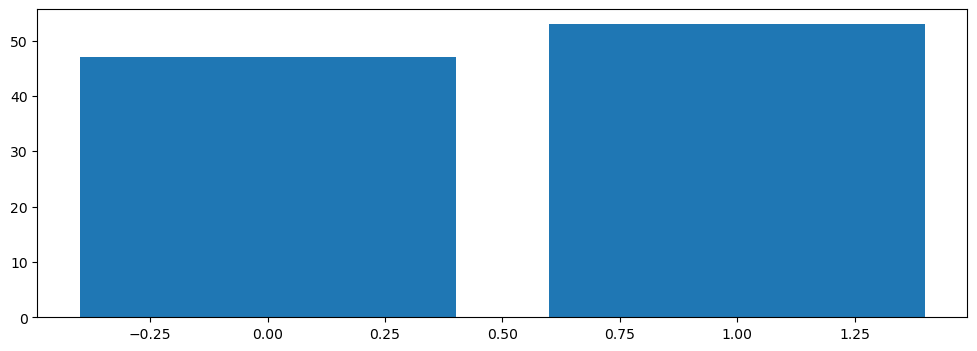

In [3]:
# Create an empty plot

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);



In [4]:
x, counts

(array([0, 1]), array([47, 53]))

### Bernoulli Distribution

In [5]:
# The Bernoulli distribution is just the binomial with the first parameter as 1
# Remember binomial can be used for multiple coins as such by setting the first parameter

def bernoulli(p, size=None):
    return np.random.binomial(1, p, size)


In [6]:
bernoulli(0.5)

1

In [7]:
# Flipping an unfair coin

rand_coins = bernoulli(0.7, 100)

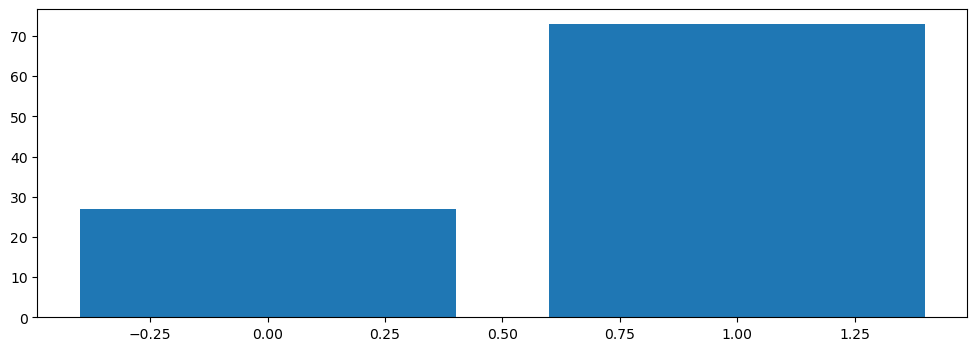

In [8]:
# Create a plot for the bernoulli

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);

In [9]:
# Flipping two coins once each
rand_coins = np.random.binomial(2, .5)

rand_coins

# Will give the number of times heads (assuming heads is a successful trial) comes up

1

In [10]:
# Flipping two 100000 times to show the results - not .333 % chance of each outcome (2xheads, 1xheads, 0xheads)
rand_coins = np.random.binomial(2, .5, 100000)

rand_coins

array([0, 2, 1, ..., 1, 2, 1])

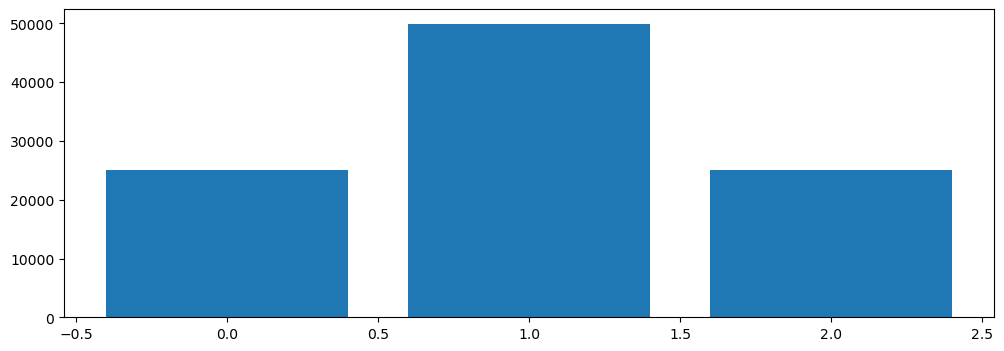

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);

**Explanation**

Possibilities = HH, HT, TH, TT (so HT = TH = 50% chance)



**Dice Rolls**



In [12]:
# Default random number generator
rng = np.random.default_rng()

In [13]:
# Roll a single Dice

rng.integers(1, 7)

1

In [14]:
# Roll a single Dice
single_rolls = rng.integers(1, 7, 100000)

In [15]:
# Count the unique values

x, counts = np.unique(single_rolls, return_counts=True)

x, counts

(array([1, 2, 3, 4, 5, 6]), array([16764, 16798, 16640, 16543, 16523, 16732]))

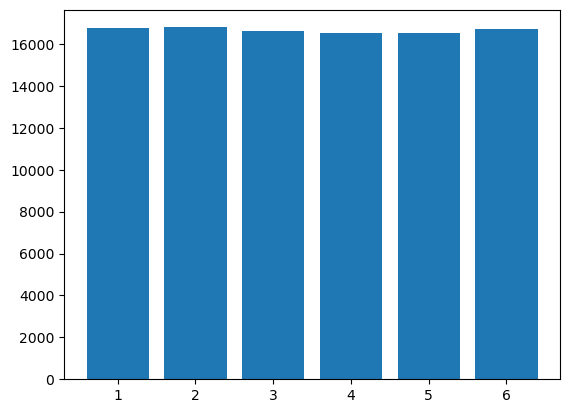

In [16]:
# Create a plot

fig, ax = plt.subplots()

ax.bar(x, counts);

In [17]:
# Roll two dice

double_rolls = rng.integers(1, 7, (100000, 2))

double_rolls

array([[6, 2],
       [4, 3],
       [1, 1],
       ...,
       [1, 3],
       [1, 4],
       [1, 2]])

In [18]:
# Sum the two dice

sum_double_rolls = double_rolls.sum(axis=1) #axis0 would sum the columns, axis1 sums by row

sum_double_rolls


array([8, 7, 2, ..., 4, 5, 3])

In [19]:
# Count the unique values

x, counts = np.unique(sum_double_rolls, return_counts=True)

x, counts

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 2800,  5561,  8423, 10989, 13870, 16927, 13787, 11062,  8302,
         5616,  2663]))

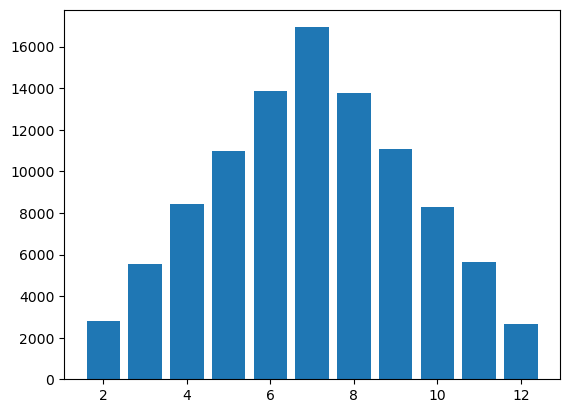

In [20]:
# Create a plot

fig, ax = plt.subplots()

ax.bar(x, counts);

In [21]:
# Plotting the individual rolls together to show how each roll is combined

individual_double_rolls = double_rolls[:,0] * 10 + double_rolls[:,1]

individual_double_rolls

array([62, 43, 11, ..., 13, 14, 12])

In [22]:
# Count the unique values

x, counts = np.unique(individual_double_rolls, return_counts=True)

x, counts

(array([11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35,
        36, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 61, 62, 63, 64,
        65, 66]),
 array([2800, 2737, 2841, 2710, 2811, 2829, 2824, 2781, 2748, 2709, 2800,
        2759, 2801, 2805, 2770, 2800, 2726, 2662, 2726, 2822, 2890, 2751,
        2777, 2761, 2758, 2824, 2858, 2798, 2759, 2769, 2784, 2693, 2825,
        2782, 2847, 2663]))

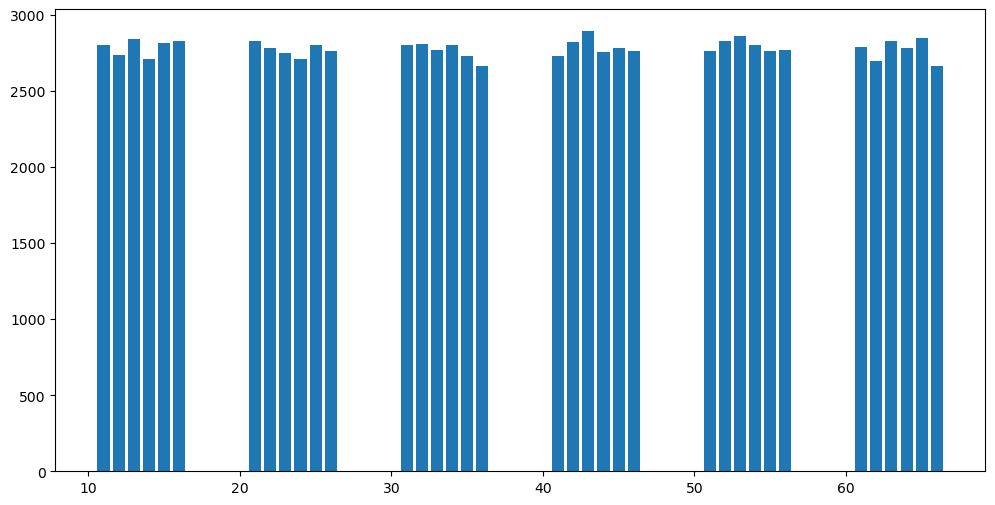

In [23]:
# Create a plot to show the breakdown of each roll

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x, counts);

The first group is the 1,1 1,2 1,3 1,4 1,5 1,6 
Second group is 2,1 2,2 2,3 2,4 2,5 2,6 
etc...

In [24]:
# Entropy

def H(p):
    return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)



In [51]:
# Entropy of 0.5

H(0.25)

0.8112781244591328

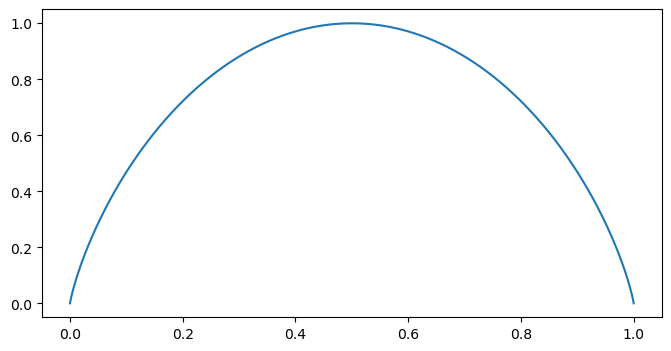

In [26]:
# Plotting Entropy

fig, ax = plt.subplots(figsize= (8,4))

# p is a probability

p = np.linspace(0.000001, 0.999999, 10001)



ax.plot(p, H(p));

In [27]:
rand_coins = np.random.binomial(2, .5, 100000)

rand_coins

array([1, 2, 0, ..., 0, 2, 2])

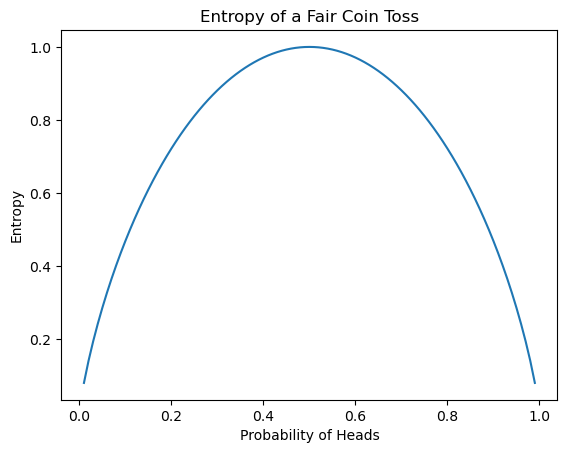

In [41]:
def entropy(p):
    """
    Calculate Shannon entropy for a given probability distribution.
    """
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def plot_entropy(n):
    """
    Plot the entropy of a fair coin toss for the first 'n' trials.
    """
    probabilities = np.arange(0.01, 1, 0.01)
    entropies = [entropy(p) for p in probabilities]

    plt.plot(probabilities, entropies)
    plt.title('Entropy of a Fair Coin Toss')
    plt.xlabel('Probability of Heads')
    plt.ylabel('Entropy')
    plt.show()

plot_entropy(100)

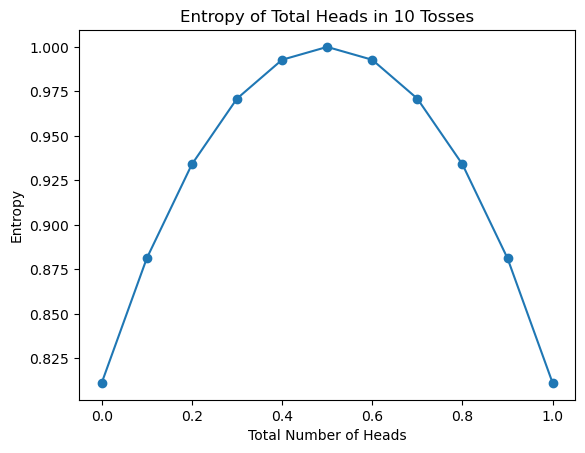

In [50]:
def entropy(p):
    """
    Calculate Shannon entropy for a given probability distribution.
    """
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def total_heads_entropy(p_heads, num_tosses):
    """
    Calculate the entropy of the total number of heads in 'num_tosses' biased coin tosses with probability 'p_heads'.
    """
    probabilities = np.arange(0, num_tosses + 1) / num_tosses  # Possible number of heads
    entropies = [entropy(p * p_heads + (1 - p) * (1 - p_heads)) for p in probabilities]

    plt.plot(probabilities, entropies, marker='o')
    plt.title(f'Entropy of Total Heads in {num_tosses} Tosses')
    plt.xlabel('Total Number of Heads')
    plt.ylabel('Entropy')
    plt.show()

# Example: Probability of getting heads is 0.6, and number of tosses is 10
total_heads_entropy(0.25, 10)